In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import joblib
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.svm import SVC

In [13]:
# reading data
df = pd.read_csv('dataset/dataset2.csv', sep=',')
df.tail()

,LBA,Entropy #1,Entropy #2,Class,Name
139995,86981456,0.994277,0.894666,1,Benign
139996,86981464,0.994598,0.896139,1,Benign
139997,86981472,0.993492,0.896921,1,Benign
139998,86981480,0.991455,0.893120,1,Benign
139999,86981488,0.993202,0.894352,1,Benign


In [5]:
# data preprocessing
data = df.drop(['Class', 'Name'], axis=1)
label = df['Class'].values
x = np.array(data)
y = np.array(label)
#y = np.reshape(label, (-1, 1))

# apply normalization operation for numerical stability
standardizer = StandardScaler()
x = standardizer.fit_transform(x)

In [6]:
print('Target variables  : ', np.unique(df['Name']))

(unique, counts) = np.unique(df['Class'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  ['Benign' 'Malicious']
Unique values of the target variable [0 1]
Counts of the target variable : [70000 70000]


In [7]:
# splitting data in training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Features Shape: (105000, 3)
Training Labels Shape: (105000,)
Testing Features Shape: (35000, 3)
Testing Labels Shape: (35000,)


Score: 96.28 %
True Positive(TP)  =  16735
False Positive(FP) =  546
True Negative(TN)  =  16862
False Negative(FN) =  857
True Postive Rate (TPR) =  0.9512846748522056
True Negative Rate (TNR) =  0.9686351102941176
False Postive Rate (FPR) =  0.048715325147794454
False Negative Rate (FNR) =  0.04923023897058824
Accuracy score:  0.9599142857142857
Precision score 0.9512846748522056
Recall score:  0.9684046062149181
F1 score:  0.959768302124853
Accuracy of the binary classification = 0.960
model score on training data: 0.9628285714285715
model score on testing data: 0.9599142857142857
Feature: 0, Score: 0.58797
Feature: 1, Score: 0.16792
Feature: 2, Score: 0.24411


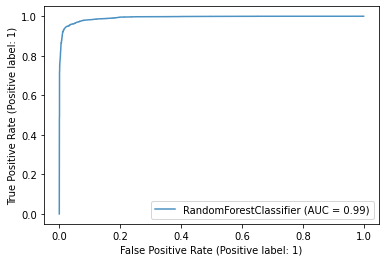

In [8]:
# train and evaluate model using RF
x, y = make_classification(n_samples=5000, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=10,max_depth=10)
clf.fit(x_train, y_train)
score_rf = clf.score(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:" ,round(score_rf * 100, 2),'%')

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

print(f'model score on training data: {clf.score(x_train, y_train)}')
print(f'model score on testing data: {clf.score(x_test, y_test)}')

# get feature importance
importance = clf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# save the model
to_persist = ([x_test], [predictions])
joblib.dump(to_persist,'dataset/Model/rf_model.joblib')

# graphing random forest results
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test, ax=ax, alpha=0.8)
rfc_disp

True Positive(TP)  =  9217
False Positive(FP) =  6276
True Negative(TN)  =  11132
False Negative(FN) =  8375
True Postive Rate (TPR) =  0.523931332423829
True Negative Rate (TNR) =  0.6394761029411765
False Postive Rate (FPR) =  0.476068667576171
False Negative Rate (FNR) =  0.4811006433823529
Accuracy score:  0.5814
Precision score 0.523931332423829
Recall score:  0.5949138320531853
F1 score:  0.5571709233791748
Accuracy of the binary classification = 0.581
model score on training data: 0.5857238095238095
model score on testing data: 0.5814


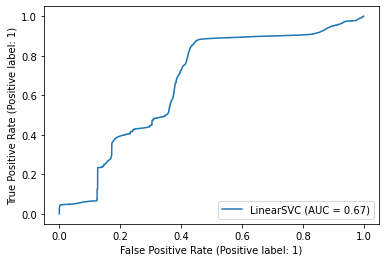

In [9]:
# train and evaluate model using SVM
SVM = svm.LinearSVC()
SVM.fit(x_train, y_train)
SVM.predict(x_test)
predictions = SVM.predict(x_test)

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

print(f'model score on training data: {SVM.score(x_train, y_train)}')
print(f'model score on testing data: {SVM.score(x_test, y_test)}')

# save the model
to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
                ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
joblib.dump(to_persist,'dataset/Model/svm_model.joblib')

# graph results

svc_disp = RocCurveDisplay.from_estimator(SVM, x_test, y_test)
rfc_disp.plot(ax=ax, alpha=0.8)

In [10]:
# train and evaluate model using MLP
NN = MLPClassifier(activation='tanh', solver='sgd')
NN.fit(x_train, y_train)
predictions = NN.predict(x_test)
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision_score(predictions, y_test))
print('Recall score: ', recall_score(predictions, y_test))
print('F1 score:', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# save the model
#to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
#               ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
#joblib.dump(to_persist,'dataset/Model/mlp_model.joblib')

True Positive(TP)  =  13735
False Positive(FP) =  867
True Negative(TN)  =  16541
False Negative(FN) =  3857
True Postive Rate (TPR) =  0.7807526148249204
True Negative Rate (TNR) =  0.9501953125
False Postive Rate (FPR) =  0.21924738517507958
False Negative Rate (FNR) =  0.22156479779411764
Accuracy score:  0.8650285714285715
Precision score 0.7807526148249204
Recall score:  0.9406245719764416
F1 score: 0.8532645834627571
Accuracy of the binary classification = 0.865


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# train and evaluate model using KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision_score(predictions, y_test))
print('Recall score: ', recall_score(predictions, y_test))
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# get feature importance
importance = clf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
                ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
joblib.dump(to_persist,'dataset/Model/knn_model.joblib')

True Positive(TP)  =  17029
False Positive(FP) =  388
True Negative(TN)  =  17020
False Negative(FN) =  563
True Postive Rate (TPR) =  0.9679968167348795
True Negative Rate (TNR) =  0.9777113970588235
False Postive Rate (FPR) =  0.032003183265120506
False Negative Rate (FNR) =  0.03234145220588235
Accuracy score:  0.9728285714285714
Precision score 0.9679968167348795
Recall score:  0.9777229143939828
F1 score:  0.9728355565711674
Accuracy of the binary classification = 0.973
Feature: 0, Score: 0.58797
Feature: 1, Score: 0.16792
Feature: 2, Score: 0.24411


['dataset/Model/knn_model.joblib']

In [12]:
# train and evaluate model using decision trees

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision_score(predictions, y_test))
print('Recall score: ', recall_score(predictions, y_test))
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# get feature importance
importance = dt.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
                ('Accuracy: ', accuracy), (x_test, predictions)]
joblib.dump(to_persist,'dataset/Model/dt_model.joblib')

True Positive(TP)  =  17388
False Positive(FP) =  227
True Negative(TN)  =  17181
False Negative(FN) =  204
True Postive Rate (TPR) =  0.9884038199181446
True Negative Rate (TNR) =  0.9869600183823529
False Postive Rate (FPR) =  0.011596180081855388
False Negative Rate (FNR) =  0.01171875
Accuracy score:  0.9876857142857143
Precision score 0.9884038199181446
Recall score:  0.9871132557479421
F1 score:  0.9877581162836936
Accuracy of the binary classification = 0.988
Feature: 0, Score: 0.74501
Feature: 1, Score: 0.03793
Feature: 2, Score: 0.21706


['dataset/Model/dt_model.joblib']